In [2]:
import numpy as np 
import math
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
'''
*****************************************************************************
1.- we want to design a a fast running HAWT (horizontal axial wind turbine) that extract 
5MW at a mean wind speed of 10m/s. 
We will use the mechanical power : P = 1/2 * ro * A * V^3 * Cp,  where Cp is the power factor,
V the average wind velocity , A the swept area , ro the density of the air at sea 
level in the standard athmosphere.

Find the size of the blade to be able to generate the required power.
*****************************************************************************

Author: Emilio Balocchi

'''


'\n1.- we want to design a a fast running HAWT (horizontal axial wind turbine) that extract \n5MW at a mean wind speed of 10m/s. \nWe will use the mechanical power : P = 1/2 * ro * A * V^3 * Cp,  where Cp is the power factor,\nV the average wind velocity , A the swept area , ro the density of the air at sea \nlevel in the standard athmosphere.\n\nFind the size of the blade to be able to generate the required power.\n\n'

In [4]:
''' parameters'''
P_nom = 5   # MW
V = 10  # average wind velocity m/s
ro = 1.225  # kg/m3 the air density at sea level in the standard atmosphere




In [5]:
''' defining a radius range of the swept area A'''
radius = np.arange(3,5,0.2)
A = list(map(lambda x: 2*math.pi*x**2,radius))


In [6]:
'''power coeficient for a fast running HAWT
   
'''
# fit a tendence line 

y = [0.44,0.45,0.43,0.39,0.3,0.2]
x = [6.2,5.4,4.8,4.1,3.3,2.6]

z = np.poly1d(np.polyfit(x, y, 2))


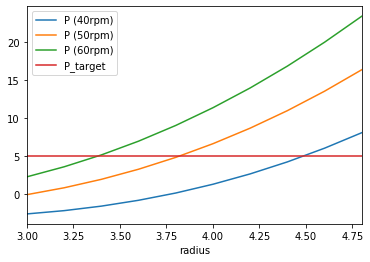

In [7]:
''' 
Considering a velocity of the low speed shaft in rpm
between 40 and 60 rpm. The mechanical power is calculated
'''
N = [40,50,60] # rpm low speed shaft

P = []
col = []

for val in N:

    w = val * 2*math.pi/60  # 1/s angular velocity

    '''derermine the tilt speed radio TSR for diferents r'''
    TSR = list(w * radius / V)

    '''interpolate Cp vs TSR from figure'''
    Cp = list(map(lambda x: z(x), TSR))

    '''calculate power for diferents swept areas (radius)'''
    P_val = list(map(lambda x,y: 0.5 * ro * x * V**3 * y / 1000 , A , Cp ))
    P.append(P_val)

    '''columns names'''
    col.append('P ('+str(val)+'rpm)')

df = pd.DataFrame.from_records(P).T
df.columns = col
df['radius'] = radius
df.set_index('radius', inplace = True)
df['P_target']=5
df.plot()

In [8]:
''' for 50 rpm the radious of the rotor should be 3.8m'''

' for 50 rpm the radious of the rotor should be 3.8m'

In [9]:
'''
*****************************************************************************
2.- Now let's do the calculation for a slow running HAWT
with a rotor with multiple blades

Find the size of the blade to be able to generate the required power.
*****************************************************************************
'''

"\n2.- Now let's do the calculation for a slow running HAWT\nwith a rotor with multiple blades\n\nFind the size of the blade to be able to generate the required power.\n\n"

In [30]:
''' defining a radius range of the swept area A'''
radius = np.arange(1,3,0.2)
A = list(map(lambda x: 2*math.pi*x**2,radius))

In [31]:
'''power coeficient for a slow running HAWT wit multiple blades
   
'''
# fit a tendence line 

y = [0.20,0.28,0.3,0.28,0.24,0.15]
x = [0.25,0.50,0.75,1.00,1.25,1.50]

z = np.poly1d(np.polyfit(x, y, 2))

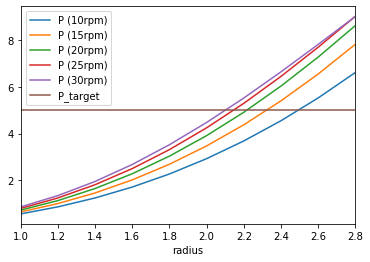

In [32]:
''' 
Considering a velocity of the low speed shaft in rpm
between 40 and 60 rpm. The mechanical power is calculated
'''
N = [10,15,20,25,30] # rpm low speed shaft

P = []
col = []

for val in N:

    w = val * 2*math.pi/60  # 1/s angular velocity

    '''derermine the tilt speed radio TSR for diferents r'''
    TSR = list(w * radius / V)

    '''interpolate Cp vs TSR from figure'''
    Cp = list(map(lambda x: z(x), TSR))

    '''calculate power for diferents swept areas (radius)'''
    P_val = list(map(lambda x,y: 0.5 * ro * x * V**3 * y / 1000 , A , Cp ))
    P.append(P_val)

    '''columns names'''
    col.append('P ('+str(val)+'rpm)')

df = pd.DataFrame.from_records(P).T
df.columns = col
df['radius'] = radius
df.set_index('radius', inplace = True)
df['P_target']=5
df.plot()

In [ ]:
'''we choose a radius of 2.2m for 20rpm rotation'''